In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import pandas as pd
import numpy as np
import sys
from PIL import Image
sys.modules["Image"] = Image

In [2]:
tf.random.set_seed(42)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
dir_name = "./Automating_Port_Operations_dataset"
test_dir = "./test_images"
train_dir = "./train_images"

In [5]:
class_names = os.listdir(dir_name)

In [6]:
shutil.rmtree(test_dir, ignore_errors=True)
shutil.rmtree(train_dir, ignore_errors=True)
os.makedirs("train_images", exist_ok=True)
os.makedirs("test_images", exist_ok=True)

In [7]:
for class_n in class_names:
    class_dir = os.path.join(dir_name, class_n)
    train_class_dir = os.path.join(train_dir, class_n)
    test_class_dir = os.path.join(test_dir, class_n)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # List image files in the class directory
    image_files = os.listdir(class_dir)
    
    # Split image files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=43, shuffle=True)
    
    # Move train files to train class directory
    for train_file in train_files:
        src_path = os.path.join(class_dir, train_file)
        dest_path = os.path.join(train_class_dir, train_file)
        shutil.copy(src_path, dest_path)
    
    # Move test files to test class directory
    for test_file in test_files:
        src_path = os.path.join(class_dir, test_file)
        dest_path = os.path.join(test_class_dir, test_file)
        shutil.copy(src_path, dest_path)

In [8]:
training_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="training", class_mode="categorical")

Found 744 images belonging to 9 classes.


In [9]:
validation_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="validation", class_mode="categorical")

Found 181 images belonging to 9 classes.


In [10]:
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 237 images belonging to 9 classes.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [52]:
model = Sequential([
        Conv2D(32, kernel_size=3, activation='relu', input_shape=(224, 224, 3), padding='same'),
        MaxPool2D(pool_size=2),
        BatchNormalization(),
        
        Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2),
        BatchNormalization(),
        
        Conv2D(32, kernel_size=3, activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        GlobalAveragePooling2D(),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(len(class_names), activation='softmax')
    ])

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 54, 54, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,673 (162.79 KB)

 Trainable params: 41,481 (162.04 KB)

 Non-trainable params: 192 (768.00 B)

In [54]:
g = model.fit(training_set, validation_data=validation_set, epochs=40, verbose=1, steps_per_epoch=len(training_set), validation_steps=len(validation_set), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.2651 - loss: 2.0015 - val_accuracy: 0.3425 - val_loss: 1.9740
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.3574 - loss: 1.7800 - val_accuracy: 0.3425 - val_loss: 1.8871
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.4247 - loss: 1.6357 - val_accuracy: 0.3149 - val_loss: 1.8530
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.4296 - loss: 1.6020 - val_accuracy: 0.3094 - val_loss: 1.8523
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.4699 - loss: 1.4884 - val_accuracy: 0.3149 - val_loss: 1.9023
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.5076 - loss: 1.4570 - val_accuracy: 0.2044 - val_loss: 1.9738
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.5244 - loss: 1.4238 - val_accuracy: 0.2320 - val_loss: 2.0685
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.5338 - loss: 1.3622 - val_accuracy: 0.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
training_loss = g.history["loss"]
val_loss = g.history["val_loss"]

training_acc = g.history["accuracy"]
val_acc = g.history["val_accuracy"]

epochs = [x + 1 for x in range(len(training_loss))]

lossdf1 = pd.DataFrame({"Epochs" : epochs, "Val Loss" : val_loss, "Training Loss" : training_loss})
accdf1 = pd.DataFrame({"Epochs" : epochs, "Val Acc" : val_acc, "Training Acc" : training_acc})

<Axes: xlabel='Epochs', ylabel='value'>

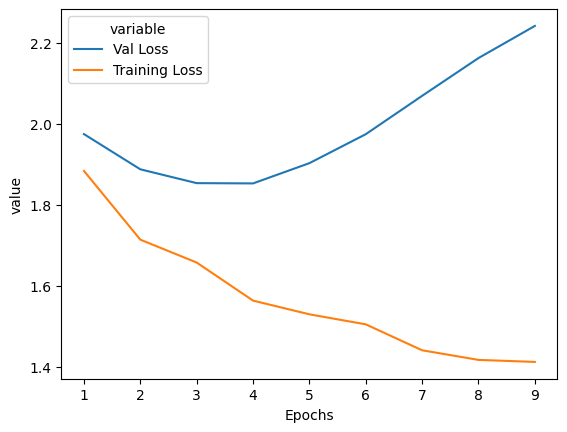

In [57]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(lossdf1, ["Epochs"]))

<Axes: xlabel='Epochs', ylabel='value'>

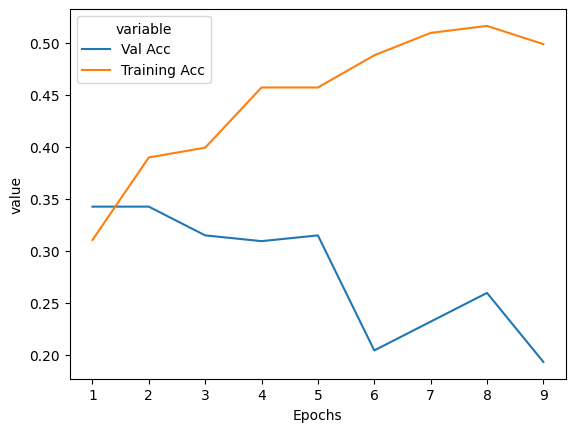

In [58]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(accdf1, ["Epochs"]))

In [59]:
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [60]:
metrics = model.evaluate(test_set)
print(f"loss {metrics[0]} \naccuracy {metrics[1]}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.3407 - loss: 1.8187 
loss 1.895389437675476 
accuracy 0.3080168664455414


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

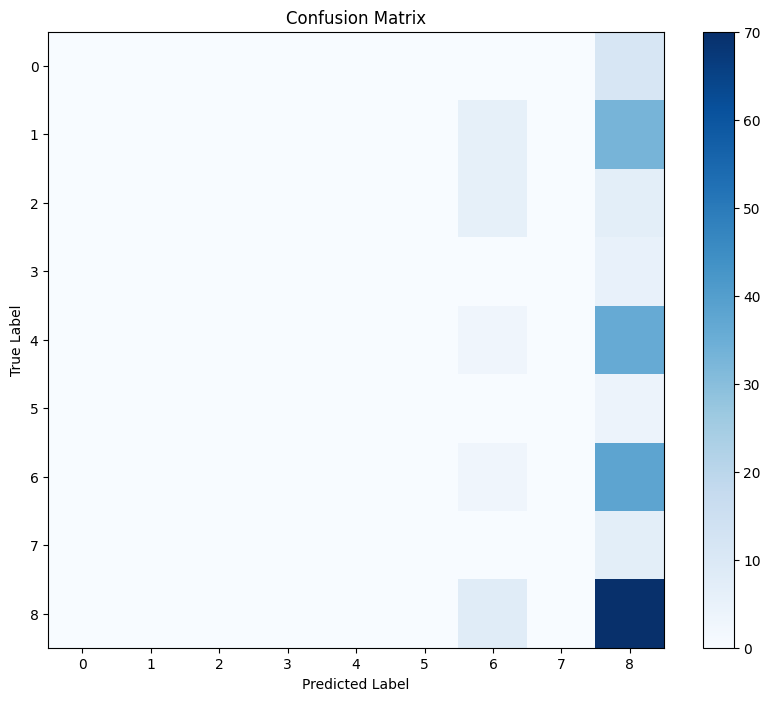

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00         4
           6       0.12      0.07      0.09        41
           7       0.00      0.00      0.00         7
           8       0.33      0.90      0.48        78

    accuracy                           0.31       237
   macro avg       0.05      0.11      0.06       237
weighted avg       0.13      0.31      0.17       237



In [62]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
class_report = classification_report(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report")
print(class_report)

In [63]:
print(conf_matrix)

[[ 0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0  6  0 33]
 [ 0  0  0  0  0  0  6  0  7]
 [ 0  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  3  0 36]
 [ 0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  3  0 38]
 [ 0  0  0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  8  0 70]]
